# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [43]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

def MeanError(estimates, actual):

    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate4(n=7, iters=100000):

    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

Estimate4()

Experiment 1
mean error xbar -0.0001615548073400788
mean error median 0.0001870470052175871


In [44]:
def RMSE(estimates, actual):

    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate5(n=7, iters=100000):

    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.515572561724441
RMSE unbiased 0.5777428478980774


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.8256183750057025
confidence interval (1.3041406023238906, 3.705250807506404)


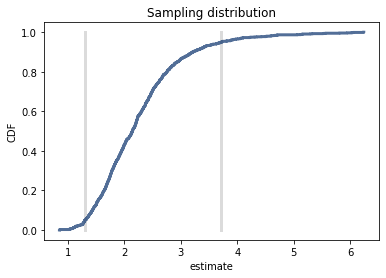

In [45]:
def SimulateSample(n, lam=2, iters=1000):

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    thinkplot.Plot([ci[0], ci[0]], [0, 1], color='0.8', linewidth=3)
    thinkplot.Plot([ci[1], ci[1]], [0, 1], color='0.8', linewidth=3)

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr, n

trial_1 = SimulateSample(n = 10)


standard error 0.20495819977131777
confidence interval (1.6998553156782523, 2.3687930286613477)


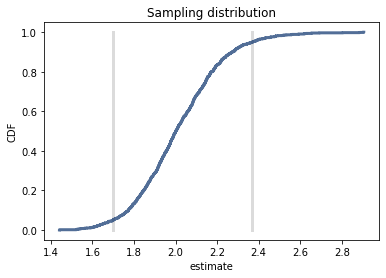

In [46]:
def SimulateSample(n, lam=2, iters=1000):

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    thinkplot.Plot([ci[0], ci[0]], [0, 1], color='0.8', linewidth=3)
    thinkplot.Plot([ci[1], ci[1]], [0, 1], color='0.8', linewidth=3)

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr, n

trial_2 = SimulateSample(n = 100)

standard error 0.06489254959336906
confidence interval (1.899961127990122, 2.1138114632365332)


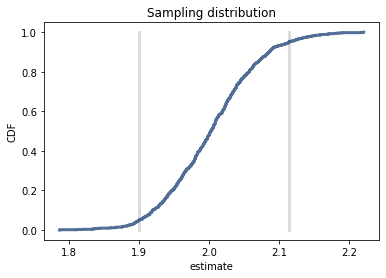

In [47]:
def SimulateSample(n, lam=2, iters=1000):

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    thinkplot.Plot([ci[0], ci[0]], [0, 1], color='0.8', linewidth=3)
    thinkplot.Plot([ci[1], ci[1]], [0, 1], color='0.8', linewidth=3)

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr, n

trial_3 = SimulateSample(n = 1000)

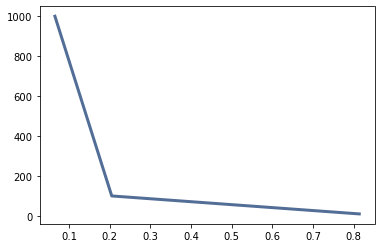

In [41]:
stderr = [trial_1[0], trial_2[0], trial_3[0]]
n = [trial_1[1], trial_2[1], trial_3[1]]
n
thinkplot.plot(stderr, n)